<h1 align="center">Airflow: Exemplos de preços de casas (housing)<h1>

Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro

Este script foi baseado no maravilhoso link:

* [Pipeline para Machine Learning com Airflow e Python](https://www.youtube.com/watch?v=V-69YH93ROY)

* [GitHub: Ozéias Godoy](https://github.com/ozeiasgodoy)

<font color="orange">Aqui vamos a treinar um modelo de preços de casas (housing in Boston) para depois usar todos os passos até o terinamento do Modelos num Pipeline com `AIRFLOW`. </font>

In [2]:
# Importando as nossas Bibliotecas

import pandas as pd
import numpy as np
import zipfile
import requests
from io import BytesIO
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Criamos um diretório

os.makedirs('./housing', exist_ok=True)

In [4]:
# Download do zip com o csv

url = "https://github.com/ozeiasgodoy/notebooks/blob/main/dados/housing.zip?raw=true"

filebytes = BytesIO(
    requests.get(url).content
)

In [5]:
# Extração do arquivo

myzip = zipfile.ZipFile(filebytes)
myzip.extractall("./housing")

In [9]:
# Carregando o arquivo extraido para um DataFrame

housing = pd.read_csv('/home/eddygiusepe/20_airflow/Apache_Airflow_with_Python/housing/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
housing.shape

(20640, 10)

In [13]:

# Verificando as Features do Dataframe
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
# verificanfo o resumo dos atributos numéricos
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


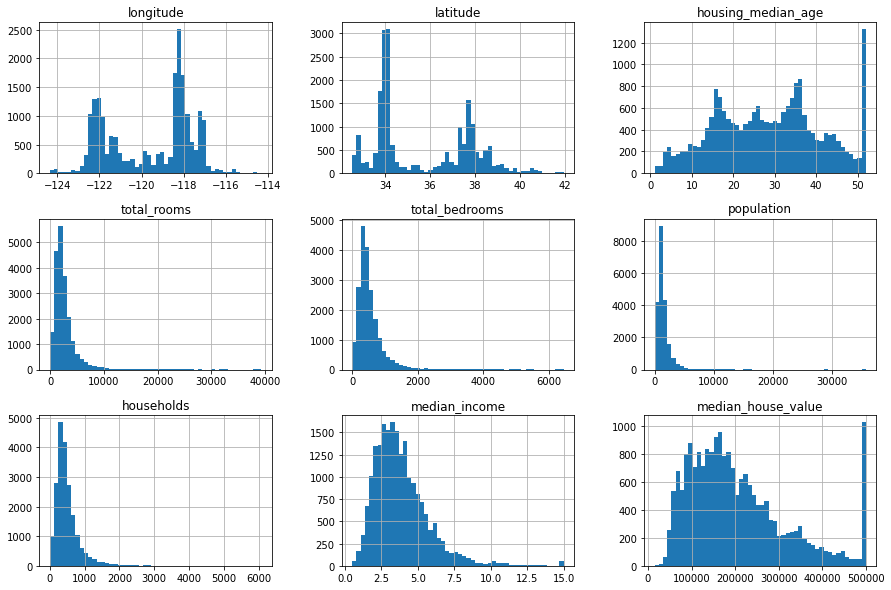

In [16]:
# Histograma dos atributos numéricos

housing.hist(bins=50, figsize=(15, 10))
plt.show()

# Explorando os Dados - EDA (Exploratory Data Analysis) 

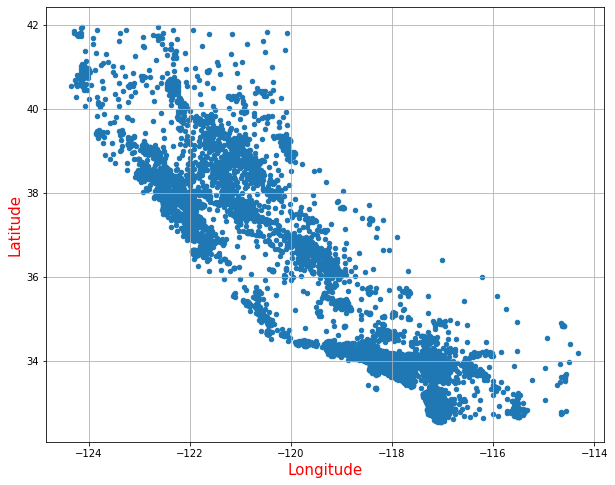

In [42]:
# Com dados de latitute e longitude (Dados geográficos), podemos criar um gráfico de dispersão para visualizar os dados de todos os bairros

housing.plot(kind="scatter", x='longitude', y='latitude', figsize=(10, 8))
plt.ylabel("Latitude", c="red", fontsize="15")
plt.xlabel("Longitude", c="red", fontsize="15")
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

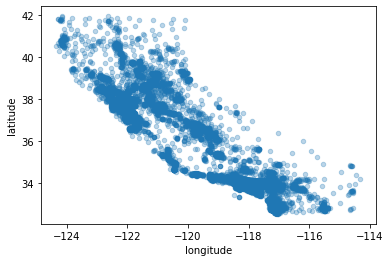

In [43]:
# Se adicionarmos o parâmetro alpha, podemos visualizar pontos com alta densidade de Dados

housing.plot(kind="scatter", x='longitude', y='latitude', alpha=0.3)

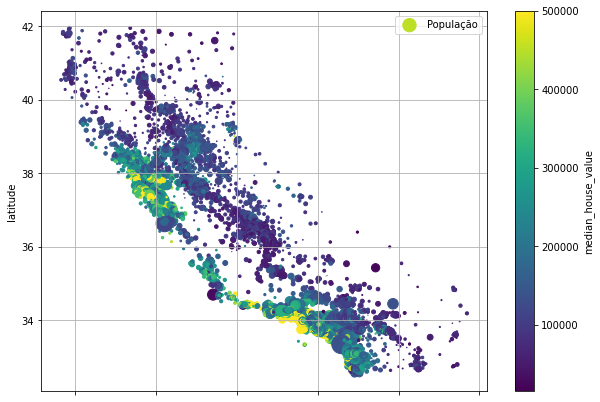

In [44]:
# Veremos agora os preços das casas
# O raio ("tamanho") de cada círculo, representa a população do bairro --> parametro s
# A cor, representa o preço --> parametro c
# Usaremos a paleta de cor rainbom, com valores mais baixo em azul e valor mais altos em vermelho: parametro cmap

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=1,
             s=housing["population"]/100, label="População", figsize=(10, 7),
             c="median_house_value", cmap=plt.get_cmap("rainbow"), colorbar=True,),
plt.legend()
plt.grid(True)
plt.show()

# Plotando as informações no mapa

In [45]:
# Download do zip com o csv
url = "https://github.com/ozeiasgodoy/notebooks/blob/main/dados/countyl010g_shp_nt00964.zip?raw=true"

filebytes = BytesIO(
    requests.get(url).content
)

# Extração do zip
myzip = zipfile.ZipFile(filebytes)
myzip.extractall("./housing")


In [ ]:
# Instalando a biblioteca para trabalhar com o mapa
#!pip install cartopy
!pip install force cartopy

In [79]:
# Importando as bibliotecas
import cartopy.crs as ccrs
#import cartopy.feature as cfeature
import matplotlib.pyplot as plt


plt.figure(figsize=(10,7))

# Criando o mapa
ca_map = plt.axes(projection=ccrs.PlateCarree())

ca_map.add_feature(cfeature.LAND)
ca_map.add_feature(cfeature.OCEAN)
ca_map.add_feature(cfeature.COASTLINE)
ca_map.add_feature(cfeature.BORDERS, linestyle=':')
ca_map.add_feature(cfeature.LAKES, alpha=0.5)
ca_map.add_feature(cfeature.RIVERS)
ca_map.add_feature(cfeature.STATES.with_scale('10m'))

# Adicionando as linhas das cidades
import cartopy.io.shapereader as shpreader

reader = shpreader.Reader('/content/housing/countyl010g.shp')
counties = list(reader.geometries())
COUNTIES = cfeature.ShapelyFeature(counties, ccrs.PlateCarree())
ca_map.add_feature(COUNTIES, facecolor='none', edgecolor='gray')

ca_map.xaxis.set_visible(True)
ca_map.yaxis.set_visible(True)

# Plotando os valores no mapa
plt.scatter(housing['longitude'], housing['latitude'], alpha=0.4, 
            s=housing["population"]/100, label="População",
            c=housing['median_house_value'], 
            cmap=plt.get_cmap("rainbow"), 
            transform=ccrs.PlateCarree())

prices = housing["median_house_value"]
cbar = plt.colorbar()
cbar.set_label('median_house_value', fontsize=16)


# Adicionando os labels de x e y
plt.ylabel("latitude", fontsize=12)
plt.xlabel("longitude", fontsize=12)
plt.legend()

ModuleNotFoundError: No module named 'cartopy'